# Credit Card Fraud Detection (Standard Python Libraries)

## Table of Contents

* [1. Introduction: The Challenge of Fraud Detection](#1.-Introduction:-The-Challenge-of-Fraud-Detection)
* [2. Setup: Import Libraries](#2.-Setup:-Import-Libraries)
* [3. Data Loading](#3.-Data-Loading)
* [4. Exploratory Data Analysis (EDA)](#4.-Exploratory-Data-Analysis-(EDA))
    * [4.1. Dataset Information and Missing Values](#4.1.-Dataset-Information-and-Missing-Values)
    * [4.2. Class Distribution (Fraud vs. Non-Fraud)](#4.2.-Class-Distribution-(Fraud-vs.-Non-Fraud))
    * [4.3. Distribution of Time and Amount for Fraudulent vs. Non-Fraudulent Transactions](#4.3.-Distribution-of-Time-and-Amount-for-Fraudulent-vs.-Non-Fraudulent-Transactions)
* [5. Data Preprocessing](#5.-Data-Preprocessing)
    * [5.1. Feature Scaling](#5.1.-Feature-Scaling)
    * [5.2. Train-Test Split](#5.2.-Train-Test-Split)
    * [5.3. Handling Imbalanced Data with SMOTE](#5.3.-Handling-Imbalanced-Data-with-SMOTE)
* [6. Model Training and Comparison](#6.-Model-Training-and-Comparison)
    * [6.1. Training Multiple Models](#6.1.-Training-Multiple-Models)
    * [6.2. Evaluating and Comparing Models](#6.2.-Evaluating-and-Comparing-Models)
* [7. Model Persistence: Saving and Loading the Best Model](#7.-Model-Persistence:-Saving-and-Loading-the-Best-Model)
* [8. Prediction Example with New Data](#8.-Prediction-Example-with-New-Data)
* [9. Conclusion](#9.-Conclusion)

This notebook provides a step-by-step guide to building a credit card fraud detection model using fundamental Python data science libraries like Pandas, NumPy, Scikit-learn, and Matplotlib. It focuses on addressing challenges typical in fraud detection, such as highly imbalanced datasets, and demonstrates how to compare multiple models to find the most suitable one.

## 1. Introduction: The Challenge of Fraud Detection

The primary goal of credit card fraud detection is to accurately identify fraudulent transactions, ensuring customers are not charged for unauthorized purchases. This is a critical task for financial institutions to prevent losses and maintain customer trust.This notebook dives into the **critical challenge** of credit card fraudulent transaction detection, a common and complex problem in data science, exacerbated by the inherently imbalanced nature of the data involved.

For aspiring data scientists and practitioners in fraud detection, the Kaggle Credit Card Fraud Detection dataset stands out as an **unparalleled resource** to begin and deepen your understanding.

**Why this dataset is ideal for starting:**
This dataset is a recognized classic in the field. It offers an authentic (though anonymized) representation of fraudulent transactions, which are by nature **highly imbalanced** (a overwhelmingly larger number of legitimate transactions compared to fraudulent ones). This imbalance presents a **fundamental and common challenge** in real-world fraud problems.

**Key Challenges in Credit Card Fraud Detection:**
1.  **High Data Volume:** Massive amounts of data are processed daily, demanding fast and efficient models for real-time response to fraudulent activities.
2.  **Imbalanced Data:** The vast majority of transactions (approximately 99.8%) are not fraudulent. This disparity makes the detection of rare fraud occurrences extremely difficult for conventional machine learning algorithms.
3.  **Data Availability:** Transaction data is mostly private and sensitive, limiting access to comprehensive and realistic datasets for research and development.
4.  **Misclassified Data:** Not all fraudulent transactions are identified and reported, leading to potential inaccuracies and noise within the data available for model training.
5.  **Adaptive Fraudster Techniques:** Fraudsters are constantly evolving, adapting their techniques. This requires detection models to be dynamic and capable of quickly adjusting to new patterns.

**Strategies to Address These Challenges:**
* **Simple and Fast Models:** Prioritize the use of models that can quickly classify transactions and detect anomalies with minimal latency.
* **Handling Imbalance:** Employ specialized methods to deal with severe class disproportion, such as oversampling (e.g., SMOTE), undersampling, or adjusting class weights.
* **Dimensionality Reduction:** Techniques like Principal Component Analysis (PCA) can be used to protect user privacy and improve computational efficiency by reducing the number of features, as exemplified by the "V-features" in this dataset.
* **Reliable Data Sources:** Whenever possible, rely on high-quality and verified data sources for robust model training and evaluation.
* **Interpretable and Adaptive Models:** Develop models that are not only effective but also interpretable, allowing for quick understanding and adjustment as fraud techniques evolve.ming techniques.

## 2. Setup: Import Libraries

In [16]:
# Import standard data science and machine learning libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

import pickle
import warnings
warnings.filterwarnings('ignore')

print(f"Python version: {sys.version.split(' ')[0]}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")

Python version: 3.12.4
Pandas version: 2.2.2
Matplotlib version: 3.8.4
Numpy version: 1.26.4
Seaborn version: 0.13.2


## 3. Data Loading

Load the credit card transaction dataset. This dataset contains transactions made by European cardholders in September 2013 over two days. The features V1-V28 are the result of a PCA transformation due to confidentiality, and `Time` and `Amount` are the only features not transformed.

The target variable `Class` indicates whether a transaction is fraudulent (1) or legitimate (0).

In [14]:
# creditcard.csv data base can be download from here:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv

# Path to your dataset. Adjust as necessary.
path = 'C:/Users/rocha/Input/'
data_path = path + 'creditcard.csv' 

df = pd.read_csv(data_path)

print("Dataset loaded successfully. First 5 rows:")
display(df.head())

Dataset loaded successfully. First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (284807, 31)


## 4. Exploratory Data Analysis (EDA)

Before diving into preprocessing and modeling, let's understand the dataset's characteristics, especially the class distribution, as imbalance is a known challenge.

### 4.1. Dataset Information and Missing Values

In [5]:
print("Dataset Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

### 4.2. Class Distribution (Fraud vs. Non-Fraud)

Visualizing the target variable (`Class`) will confirm the severe imbalance.

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


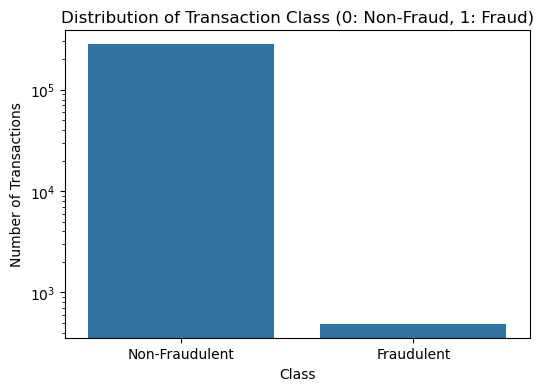


Fraudulent transactions: 492
Non-fraudulent transactions: 284315


In [15]:
# When dealing with highly imbalanced datasets like this one, a standard count plot often makes the minority 
# class virtually invisible due to the large difference in magnitudes.
# To address this, I've include a logarithmic scale on the y-axis for the "Distribution of Transaction Classes" bar chart

print("Class distribution:")
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Transaction Class (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.yscale('log') # This line applies the log scale
plt.show()

fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

print(f"\nFraudulent transactions: {len(fraud)}")
print(f"Non-fraudulent transactions: {len(non_fraud)}")

### 4.3. Distribution of Time and Amount for Fraudulent vs. Non-Fraudulent Transactions

Understanding the distribution of `Time` and `Amount` for both classes can provide insights into potential patterns.

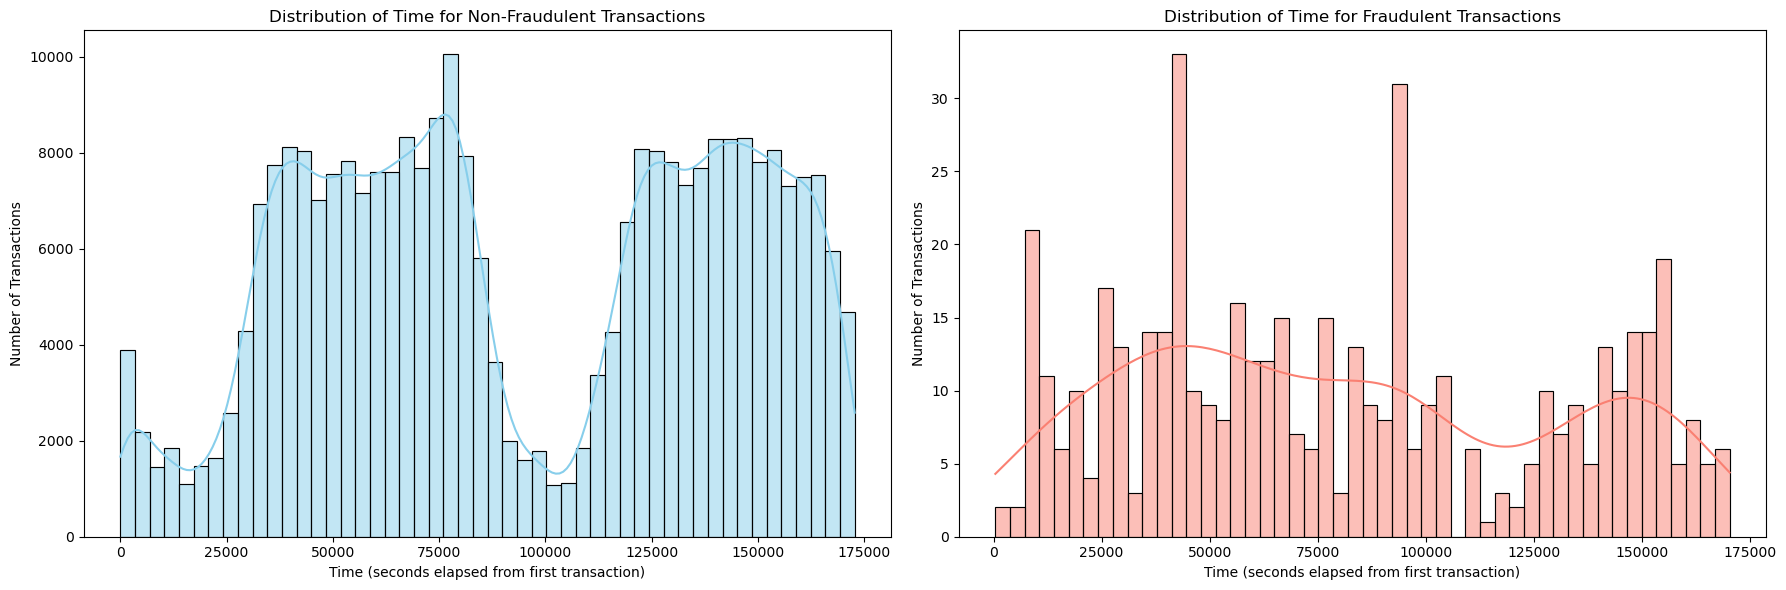

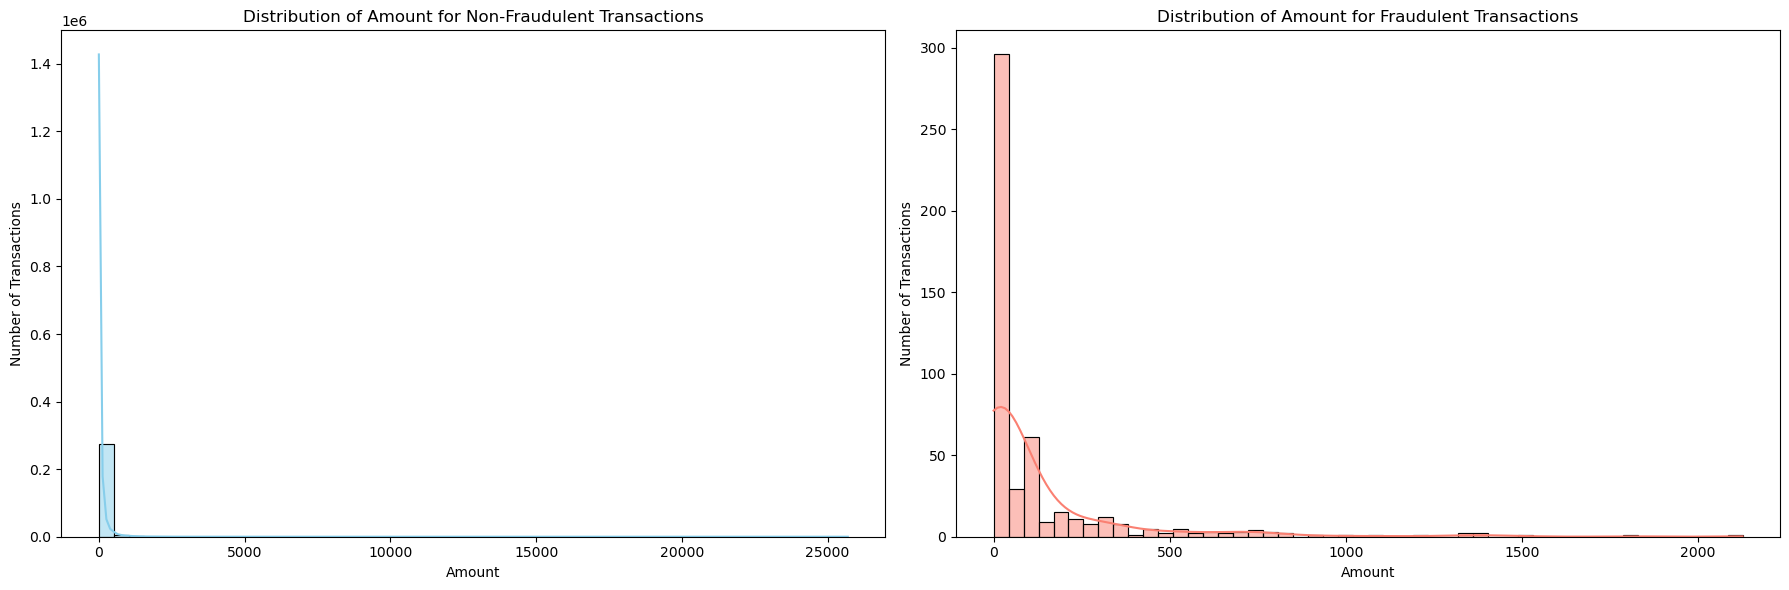

In [7]:
# Distribution of Time
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.histplot(df['Time'][df['Class'] == 0], bins=50, color='skyblue', ax=ax1, kde=True)
ax1.set_title('Distribution of Time for Non-Fraudulent Transactions')
ax1.set_xlabel('Time (seconds elapsed from first transaction)')
ax1.set_ylabel('Number of Transactions')

sns.histplot(df['Time'][df['Class'] == 1], bins=50, color='salmon', ax=ax2, kde=True)
ax2.set_title('Distribution of Time for Fraudulent Transactions')
ax2.set_xlabel('Time (seconds elapsed from first transaction)')
ax2.set_ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

# Distribution of Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.histplot(df['Amount'][df['Class'] == 0], bins=50, color='skyblue', ax=ax1, kde=True)
ax1.set_title('Distribution of Amount for Non-Fraudulent Transactions')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Number of Transactions')

sns.histplot(df['Amount'][df['Class'] == 1], bins=50, color='salmon', ax=ax2, kde=True)
ax2.set_title('Distribution of Amount for Fraudulent Transactions')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

Based on the histograms for `Time` and `Amount` for both fraudulent and non-fraudulent transactions, we can draw the following conclusions:

* **Time Distribution:** The `Time` feature represents the seconds elapsed since the first transaction in the dataset, covering approximately 48 hours (or two days).
    * **Non-Fraudulent transactions** appear to be distributed relatively consistently throughout this ~48-hour period, showing a general pattern typical of daily transaction volumes.
    * **Fraudulent transactions**, while also spread across the two days, exhibit distinct clusters or spikes at certain time intervals (e.g., noticeable peaks around the start of the period and a dip/lower activity around the middle, followed by another increase). This suggests that fraudulent activities might occur more frequently during specific periods, or that fraudsters exploit particular time windows for their activities. This temporal pattern could be a valuable feature for distinguishing fraud.

* **Amount Distribution:**
    * **Non-Fraudulent transactions** are heavily concentrated at lower amounts, with a long tail extending to very large transaction values, which is typical for everyday spending and occasional large purchases. The vast majority of legitimate transactions are for small sums.
    * **Fraudulent transactions** also show a high concentration at smaller amounts. However, they generally do not reach the extremely high values observed in legitimate transactions. This indicates that fraudsters might prefer to conduct smaller, less conspicuous transactions to avoid immediate detection, or that larger fraudulent attempts are more likely to be caught by existing security measures. The difference in the upper range of transaction amounts is a notable discriminator.

These visual insights highlight that while `Time` and `Amount` are not PCA-transformed, they still contain valuable patterns that can help differentiate fraudulent activities from legitimate ones. This reinforces the decision to include them (or their scaled versions) as features in our model.

## 5. Data Preprocessing

This section prepares the data for model training. Key steps include scaling numerical features and splitting the dataset into training and testing sets. We will then address the class imbalance in the training set.

### 5.1. Feature Scaling

The `Time` and `Amount` features are not scaled and have very different ranges compared to the PCA-transformed `V` features. Scaling these features is crucial for many machine learning algorithms (especially those based on distance or gradient descent) to perform optimally.

In [8]:
# Standardize 'Amount' and 'Time' features
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original 'Time' and 'Amount' columns, keeping only scaled versions and V-features
df_processed = df.drop(['Time', 'Amount'], axis=1)

print("Original 'Amount' and 'Time' columns dropped, scaled versions added.")
display(df_processed.head())

Original 'Amount' and 'Time' columns dropped, scaled versions added.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


### 5.2. Train-Test Split

Splitting the data ensures that the model is evaluated on unseen data, providing a more realistic assessment of its generalization performance. We use a stratified split to maintain the same proportion of fraudulent and non-fraudulent transactions in both training and testing sets, which is particularly important for imbalanced datasets.

In [9]:
# Define features (X) and target (y)
X = df_processed.drop('Class', axis=1)
y = df_processed['Class']

# Split the data into training and testing sets
# stratify=y ensures that the proportion of classes is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True) * 100)
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True) * 100)

X_train shape: (227845, 30), y_train shape: (227845,)
X_test shape: (56962, 30), y_test shape: (56962,)

Class distribution in y_train:
Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

Class distribution in y_test:
Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


### 5.3. Handling Imbalanced Data with SMOTE

Given the severe class imbalance, training a model directly on the original data would likely lead to a model that performs poorly on the minority (fraudulent) class. SMOTE (Synthetic Minority Over-sampling Technique) is used here to generate synthetic samples for the minority class, helping the model learn more effectively from fraudulent cases. **It's crucial to apply SMOTE only to the training data to prevent data leakage.**

In [12]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE on training data:")
print(y_train_resampled.value_counts(normalize=True) * 100)
print(f"X_train_resampled shape: {X_train_resampled.shape}, y_train_resampled shape: {y_train_resampled.shape}")

Class distribution after SMOTE on training data:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64
X_train_resampled shape: (454902, 30), y_train_resampled shape: (454902,)


## 6. Model Training and Comparison

This section focuses on training multiple machine learning models and comparing their performance to identify the most suitable one for fraud detection. We will evaluate them on the unseen test set, paying close attention to metrics relevant for imbalanced datasets.

### 6.1. Training Multiple Models

We will train a few common classification models on our SMOTE-resampled training data:
* **Logistic Regression:** A simple, interpretable linear model, often a good baseline.
* **Decision Tree Classifier:** A non-linear model that can capture complex relationships.
* **Random Forest Classifier:** An ensemble method that builds multiple decision trees to improve accuracy and reduce overfitting.
* **Gradient Boosting Classifier:** Another powerful ensemble technique that builds trees sequentially, with each tree correcting errors of the previous one.

In [13]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42, C=0.01), # C is inverse of regularization strength
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'), # 'balanced' handles imbalance
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

trained_models = {}
print("Training various models...")
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    trained_models[name] = model
    print(f"{name} training complete.")

Training various models...

Training Logistic Regression...
Logistic Regression training complete.

Training Decision Tree...
Decision Tree training complete.

Training Random Forest...
Random Forest training complete.

Training Gradient Boosting...
Gradient Boosting training complete.


### 6.2. Evaluating and Comparing Models

Evaluate each trained model on the unseen test set (`X_test`, `y_test`). For imbalanced datasets like this, standard accuracy can be misleading. We will focus on metrics such as Precision, Recall, F1-Score, and ROC AUC, which provide a more comprehensive view of the model's performance, particularly for the minority (fraudulent) class.

* **Precision:** The proportion of positive identifications that were actually correct. High precision means fewer false positives (classifying legitimate as fraud).
* **Recall (Sensitivity):** The proportion of actual positives that were identified correctly. High recall means fewer false negatives (missing actual fraudulent transactions).
* **F1-Score:** The harmonic mean of precision and recall, providing a single metric that balances both.
* **ROC AUC:** Measures the ability of a classifier to distinguish between classes. A higher AUC indicates a better model performance at distinguishing between positive and negative classes.

We will summarize these metrics to identify the best-performing model.


Evaluating models on the test set...

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



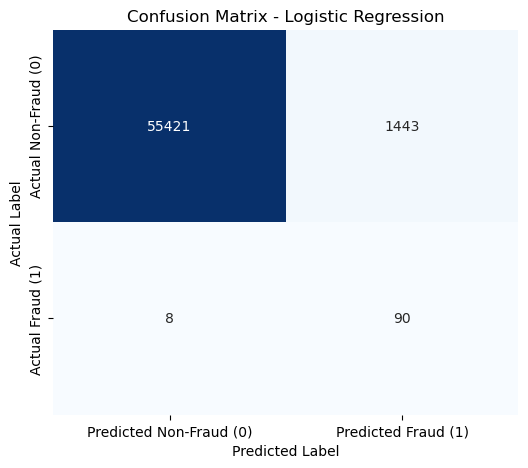

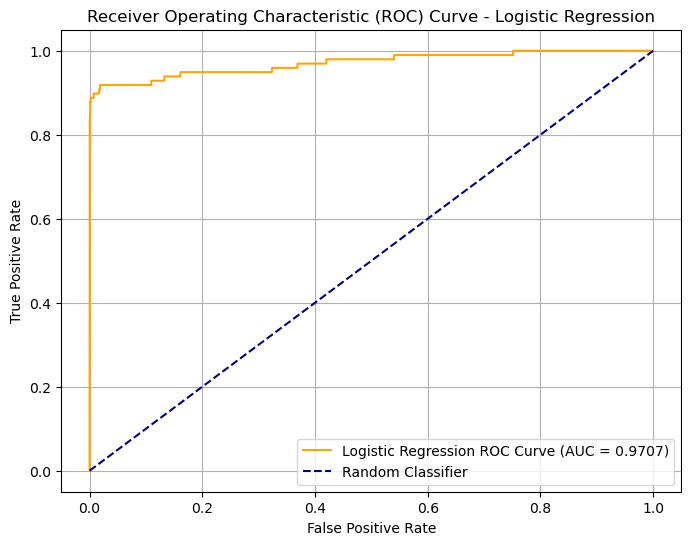


--- Decision Tree Performance ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.78      0.47        98

    accuracy                           1.00     56962
   macro avg       0.67      0.89      0.74     56962
weighted avg       1.00      1.00      1.00     56962



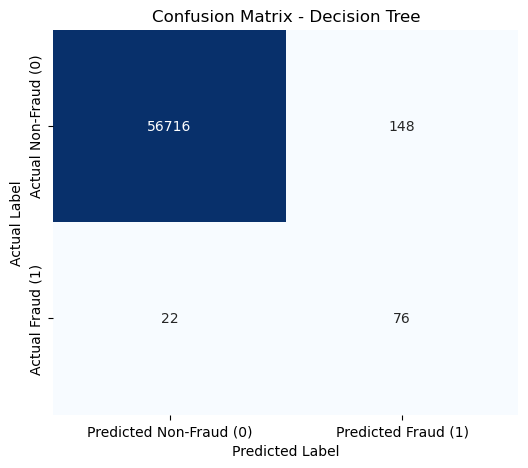

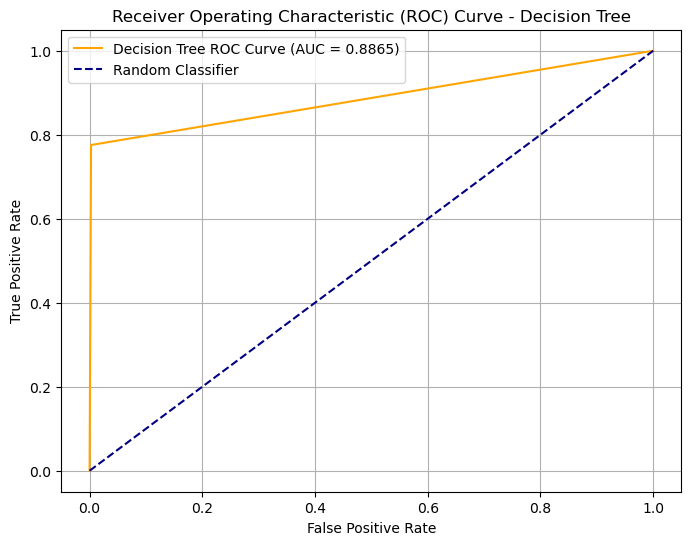


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



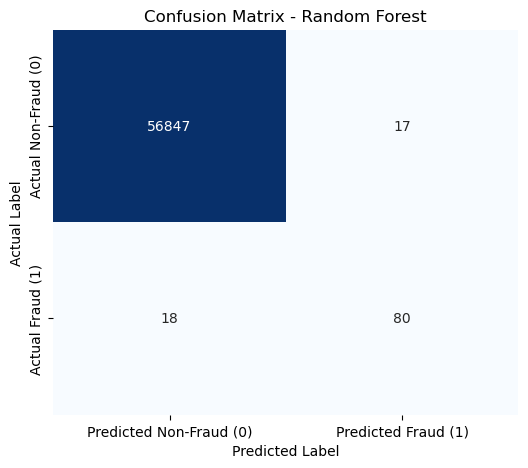

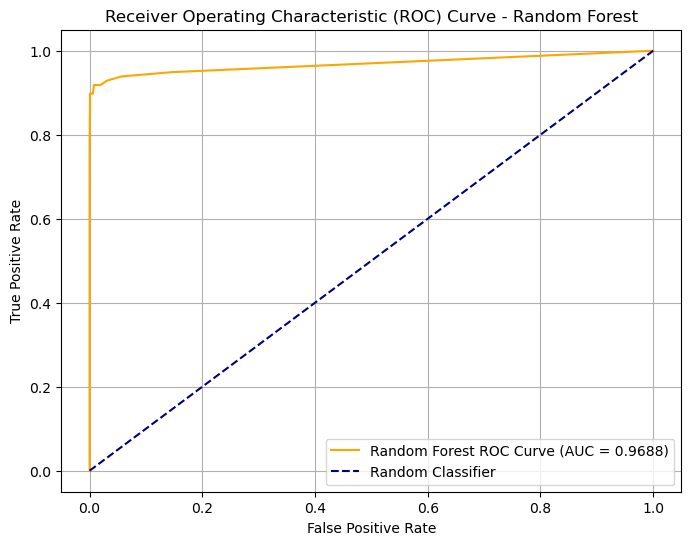


--- Gradient Boosting Performance ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.90      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962



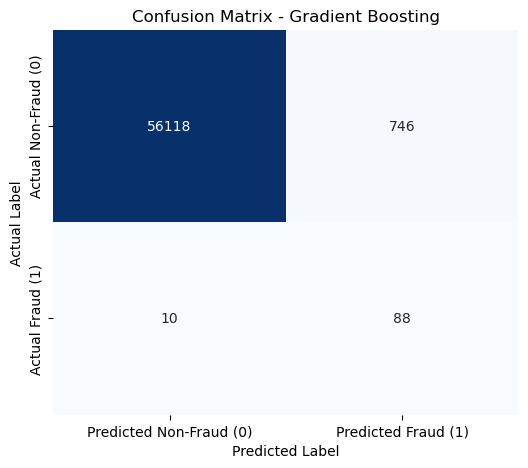

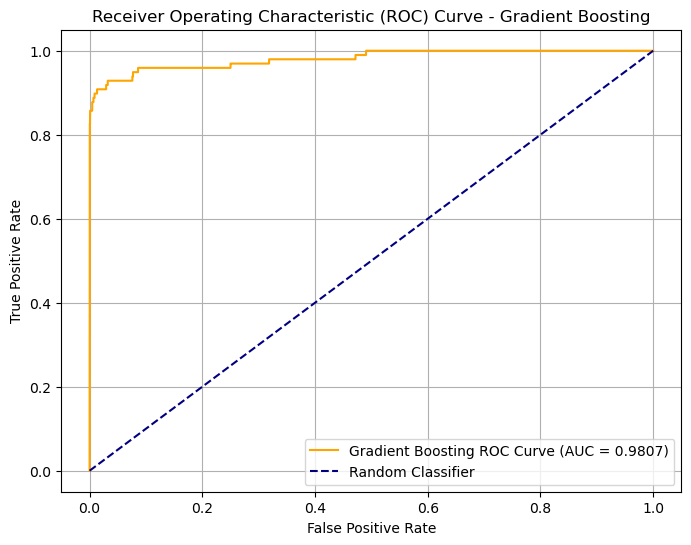


--- Model Comparison Summary ---


,Accuracy,Precision (Fraud),Recall (Fraud),F1-Score (Fraud),ROC AUC
Model,,,,,
Random Forest,0.999386,0.824742,0.816327,0.820513,0.968830
Decision Tree,0.997016,0.339286,0.775510,0.472050,0.886454
Gradient Boosting,0.986728,0.105516,0.897959,0.188841,0.980743
Logistic Regression,0.974527,0.058708,0.918367,0.110362,0.970733



Based on F1-Score, the best performing model is: Random Forest


In [14]:
results = []
best_f1_score = -1
best_model_name = None
best_model_instance = None

print("\nEvaluating models on the test set...")
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision (Fraud)': prec,
        'Recall (Fraud)': rec,
        'F1-Score (Fraud)': f1,
        'ROC AUC': roc_auc
    })
    
    print(f"\n--- {name} Performance ---")
    print(classification_report(y_test, y_pred))
    
    if f1 > best_f1_score: # Prioritize F1-score for imbalance
        best_f1_score = f1
        best_model_name = name
        best_model_instance = model
        
    # Plot Confusion Matrix for each model
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Non-Fraud (0)', 'Predicted Fraud (1)'],
                yticklabels=['Actual Non-Fraud (0)', 'Actual Fraud (1)'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot ROC Curve for each model
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', label=f'{name} ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

results_df = pd.DataFrame(results).set_index('Model')
print("\n--- Model Comparison Summary ---")
display(results_df.sort_values(by='F1-Score (Fraud)', ascending=False))

print(f"\nBased on F1-Score, the best performing model is: {best_model_name}")
final_model = best_model_instance # Assign the best model to final_model

## 7. Model Persistence: Saving and Loading the Best Model

To use the selected best model for future predictions without retraining, it's essential to save it to disk. We'll save the `final_model` object (our chosen classifier) and the `scaler` object (used for feature scaling) using Python's `pickle` module. This ensures that new data can be preprocessed identically before being fed to the loaded model.

In [15]:
if 'final_model' in locals() and final_model is not None:
    # Save the best trained model and scaler
    # Dynamically name the model file based on the best model's name
    model_filename = f'{best_model_name.lower().replace(" ", "_")}_fraud_model.pkl'
    scaler_filename = 'standard_scaler_fraud.pkl'
    
    with open(model_filename, 'wb') as file:
        pickle.dump(final_model, file)

    with open(scaler_filename, 'wb') as file:
        pickle.dump(scaler, file)

    print(f"Best model ('{best_model_name}') saved to {model_filename}")
    print(f"Scaler saved to {scaler_filename}")

    # Load the model and scaler for prediction example (demonstration)
    with open(model_filename, 'rb') as file:
        loaded_model = pickle.load(file)

    with open(scaler_filename, 'rb') as file:
        loaded_scaler = pickle.load(file)

    print("\nModel and scaler loaded successfully for demonstration.")
else:
    print("No best model was selected or trained. Cannot save/load. Ensure section 6 was run successfully.")

Best model ('Random Forest') saved to random_forest_fraud_model.pkl
Scaler saved to standard_scaler_fraud.pkl

Model and scaler loaded successfully for demonstration.


## 8. Prediction Example with New Data

This section demonstrates how to use the loaded, best-performing model and scaler to make predictions on a new, unseen transaction. It's crucial that any new data passed to the model undergoes the *exact same preprocessing steps* (scaling in this case) as the data used for training.

In [16]:
if 'loaded_model' in locals() and 'loaded_scaler' in locals():
    # Create a new (simulated) entry for prediction
    # IMPORTANT: 'Time' and 'Amount' columns must be in their ORIGINAL scale for the loaded_scaler.
    # V1-V28 columns are assumed to be already PCA-transformed (as in the original dataset).
    new_transaction_data = pd.DataFrame({
        'Time': [1000.0],  # Original time value
        'V1': [-0.966272],
        'V2': [-0.185226],
        'V3': [1.792993],
        'V4': [-0.863291],
        'V5': [-0.010309],
        'V6': [1.247203],
        'V7': [0.237609],
        'V8': [0.377436],
        'V9': [-1.387024],
        'V10': [-0.535426],
        'V11': [-0.762494],
        'V12': [-0.405571],
        'V13': [-0.648539],
        'V14': [-0.425574],
        'V15': [-0.582884],
        'V16': [-0.468037],
        'V17': [-0.483748],
        'V18': [-0.498850],
        'V19': [-0.456299],
        'V20': [-0.211721],
        'V21': [-0.228395],
        'V22': [-0.542350],
        'V23': [-0.161846],
        'V24': [-0.354586],
        'V25': [-0.317145],
        'V26': [-0.326984],
        'V27': [-0.070840],
        'V28': [-0.052960],
        'Amount': [45.0]  # Original amount value
    })

    print("New transaction entry for prediction:")
    display(new_transaction_data)

    # Preprocess the new entry using the loaded scaler
    new_data_processed = new_transaction_data.copy()
    new_data_processed['Amount_scaled'] = loaded_scaler.transform(new_data_processed['Amount'].values.reshape(-1, 1))
    new_data_processed['Time_scaled'] = loaded_scaler.transform(new_data_processed['Time'].values.reshape(-1, 1))
    new_data_features = new_data_processed.drop(['Time', 'Amount'], axis=1)

    print("\nPreprocessed new entry (ready for prediction):")
    display(new_data_features)

    # Make prediction using the loaded model
    prediction_label = loaded_model.predict(new_data_features)
    prediction_proba = loaded_model.predict_proba(new_data_features)[:, 1]

    print("\nPrediction Result:")
    if prediction_label[0] == 1:
        print(f"Alert: The transaction is predicted as FRAUDULENT (Probability: {prediction_proba[0]:.4f}).")
    else:
        print(f"The transaction is predicted as NON-FRAUDULENT (Probability: {prediction_proba[0]:.4f}).")
else:
    print("Loaded model or scaler not available. Ensure section 7 was run successfully.")

New transaction entry for prediction:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1000.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.211721,-0.228395,-0.54235,-0.161846,-0.354586,-0.317145,-0.326984,-0.07084,-0.05296,45.0



Preprocessed new entry (ready for prediction):


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled
0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.535426,...,-0.228395,-0.54235,-0.161846,-0.354586,-0.317145,-0.326984,-0.07084,-0.05296,-1.995635,-1.975525



Prediction Result:
The transaction is predicted as NON-FRAUDULENT (Probability: 0.0000).


## 9. Conclusion

This notebook demonstrates a complete credit card fraud detection workflow using standard Python libraries. Key steps included:

* **Data Loading and EDA:** Understanding the dataset, especially the severe class imbalance.
* **Data Preprocessing:** Scaling numerical features (`Time` and `Amount`) and splitting data.
* **Imbalance Handling:** Applying SMOTE to the training data to balance classes for better model learning.
* **Model Training and Comparison:** Training and evaluating multiple models to identify the best performer for this task, focusing on appropriate metrics for imbalanced datasets.
* **Model Persistence:** Saving and loading the selected best trained model and its associated scaler for future use.
* **Prediction Example:** Demonstrating how to make predictions on new, unseen data.

This foundational approach can be extended by exploring more advanced hyperparameter tuning for the chosen model, or alternative ensemble techniques.

## Author

**Author:** Paulo Barbosa

**Date:** 2025-07-20